# Healthcare predctive analytics project 

## I. EDA and Preprocessing Steps

### 1.1 Loading the data and Essential Libraries

In [22]:
# Importing essential libraries
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
# Load the dataset
df = pd.read_csv("cardio_data.csv")

In [24]:
# Display the first few rows
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


### 1.2 Initial Exploration 

In [25]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [26]:
# Descriptive statistics
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [27]:
# Checking for missing values
df.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

### After exploring the data we will take these steps in cleaning and preprocessing:
1. Convert age from days to years

2. Drop irrelevant columns like id and possibly date

3. Encode categorical/binary variables

4. Handle any outliers or anomalies

5. Ensure target variable (disease) is in 0/1 format

### 1.3 Converting age column 

In [28]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

### 1.4 Dropping Unnecesary columns

In [29]:
# Drop irrelevant columns
df.drop(['id', 'date', 'age'], axis=1, inplace=True)

### 1.5 Checking unique values

In [30]:
# Check unique values for categorical variables
for col in ['cholesterol', 'gluc', 'gender', 'active', 'alco', 'smoke']:
    print(f"{col} unique values: {df[col].unique()}")

cholesterol unique values: [1 3 2]
gluc unique values: [1 2 3]
gender unique values: [2 1]
active unique values: [1 0]
alco unique values: [0 1]
smoke unique values: [0 1]


### 1.6 EDA Visualisation

In [31]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

### 1.6.1 Target Variable Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\2300530236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='disease', palette='Set2')


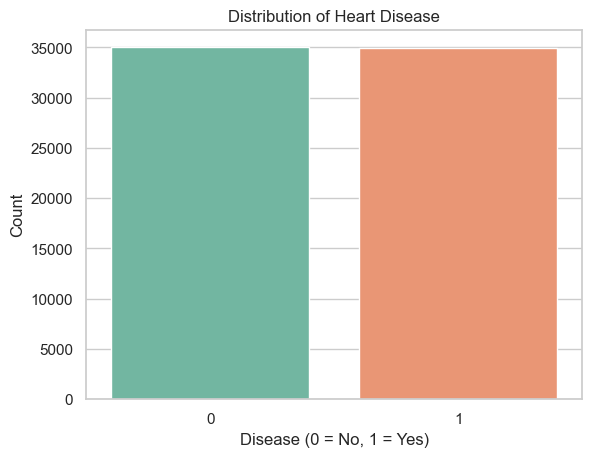

disease
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [32]:
# Let’s see the balance between people with and without heart disease.

sns.countplot(data=df, x='disease', palette='Set2')
plt.title("Distribution of Heart Disease")
plt.xlabel("Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Check imbalance
df['disease'].value_counts(normalize=True)


### 1.6.2 Age Distribution by Disease Status

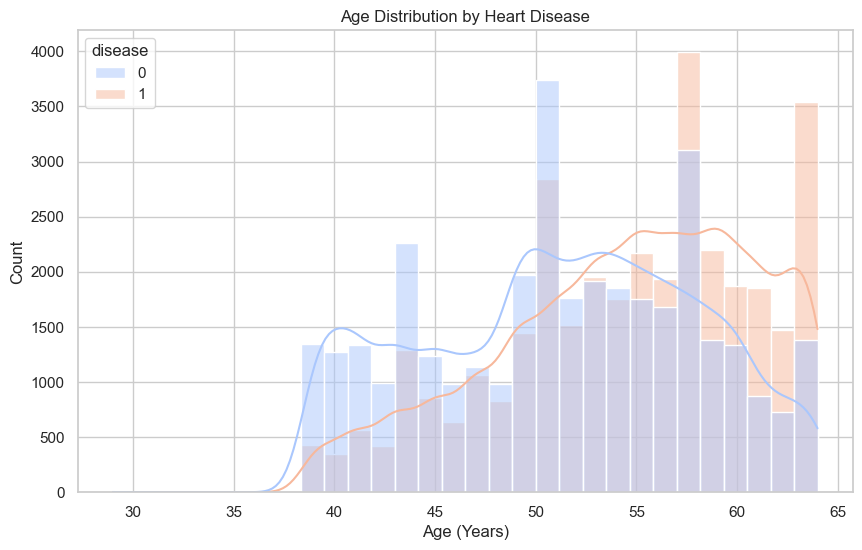

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_years', hue='disease', bins=30, kde=True, palette='coolwarm')
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

### 1.6.3 Cholesterol vs Heart Disease

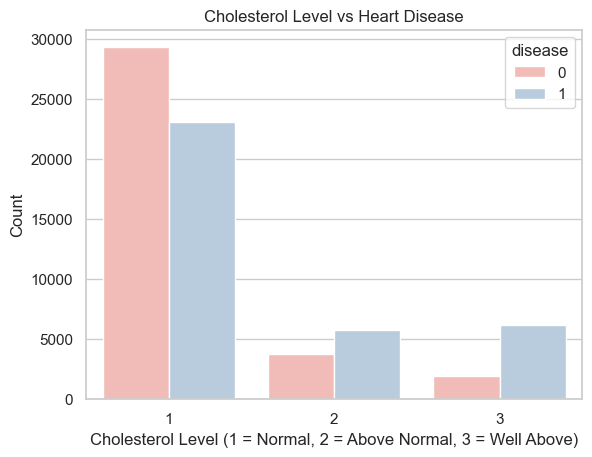

In [34]:
sns.countplot(data=df, x='cholesterol', hue='disease', palette='Pastel1')
plt.title("Cholesterol Level vs Heart Disease")
plt.xlabel("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = Well Above)")
plt.ylabel("Count")
plt.show()

### 1.6.4 Blood Pressure Comparison (ap_hi & ap_lo)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\1622649114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease', y='ap_hi', palette='YlGnBu')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\1622649114.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease', y='ap_lo', palette='YlOrRd')


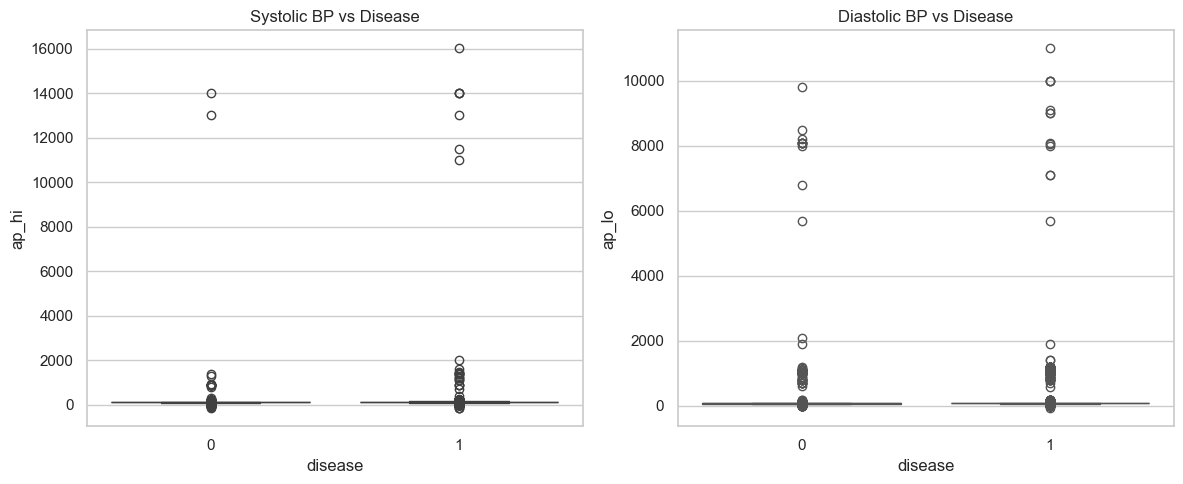

In [35]:
plt.figure(figsize=(12, 5))

# Systolic
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='disease', y='ap_hi', palette='YlGnBu')
plt.title("Systolic BP vs Disease")

# Diastolic
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='disease', y='ap_lo', palette='YlOrRd')
plt.title("Diastolic BP vs Disease")

plt.tight_layout()
plt.show()

### results seems unrealistic as to some outliers we will deal with that

## 1.6.4.1 Dealing with Outliers

In [36]:
# Investigate Outliers
print(df['ap_hi'].describe())
print(df['ap_lo'].describe())

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64
count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64


In [37]:
# We'll clean ap_hi and ap_lo to remove implausible values.

# Rows before cleaning
initial_rows = df.shape[0]

# Remove invalid systolic BP values (ap_hi)
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]

# Remove invalid diastolic BP values (ap_lo)
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)]

# Rows after cleaning
final_rows = df.shape[0]
print(f"Rows dropped: {initial_rows - final_rows}")

Rows dropped: 1391


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\541589064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease', y='ap_hi', palette='YlGnBu')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\541589064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease', y='ap_lo', palette='YlOrRd')


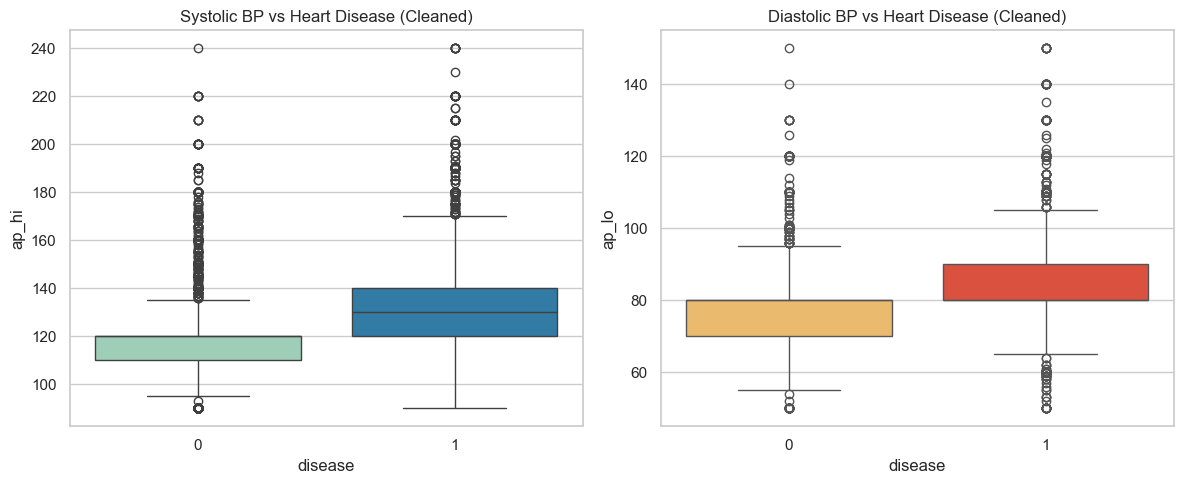

In [38]:
plt.figure(figsize=(12, 5))

# Systolic
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='disease', y='ap_hi', palette='YlGnBu')
plt.title("Systolic BP vs Heart Disease (Cleaned)")

# Diastolic
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='disease', y='ap_lo', palette='YlOrRd')
plt.title("Diastolic BP vs Heart Disease (Cleaned)")

plt.tight_layout()
plt.show()

More realistic values

### 1.6.5 Lifestyle Factors: Smoking, Alcohol, Physical Activity

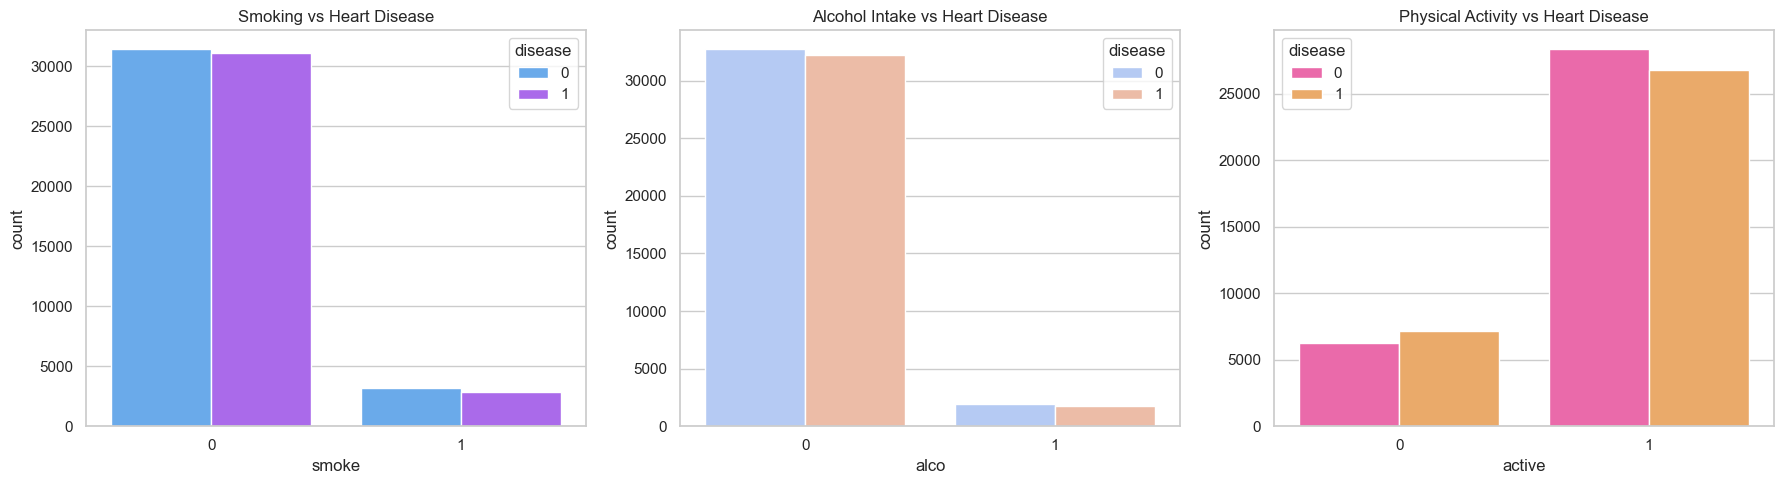

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='smoke', hue='disease', ax=axes[0], palette='cool')
axes[0].set_title('Smoking vs Heart Disease')

sns.countplot(data=df, x='alco', hue='disease', ax=axes[1], palette='coolwarm')
axes[1].set_title('Alcohol Intake vs Heart Disease')

sns.countplot(data=df, x='active', hue='disease', ax=axes[2], palette='spring')
axes[2].set_title('Physical Activity vs Heart Disease')

plt.tight_layout()
plt.show()

                                            Reminder that 0=no 1=yes

### 1.6.6 Correlation Matrix

In [40]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Indonesia'

<Figure size 1200x800 with 0 Axes>

In [41]:
# Check data types
print(df.dtypes[df.dtypes == 'object'])

# Check unique values 
print(df['country'].value_counts())

country       object
occupation    object
dtype: object
country
Singapore    17324
Indonesia    17169
Malaysia     17070
India        17046
Name: count, dtype: int64


### 1.7 Dealing with data type

Fixing the corralation matrex plot issue

In [42]:
df_encoded = pd.get_dummies(df, columns=['country', 'occupation'], drop_first=True)

In [43]:
# Convert any remaining boolean columns to integers
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})

In [44]:
# Check for any non-numeric types
print("Non-numeric columns:", df_encoded.select_dtypes(exclude=['int64', 'float64']).columns.tolist())

Non-numeric columns: []


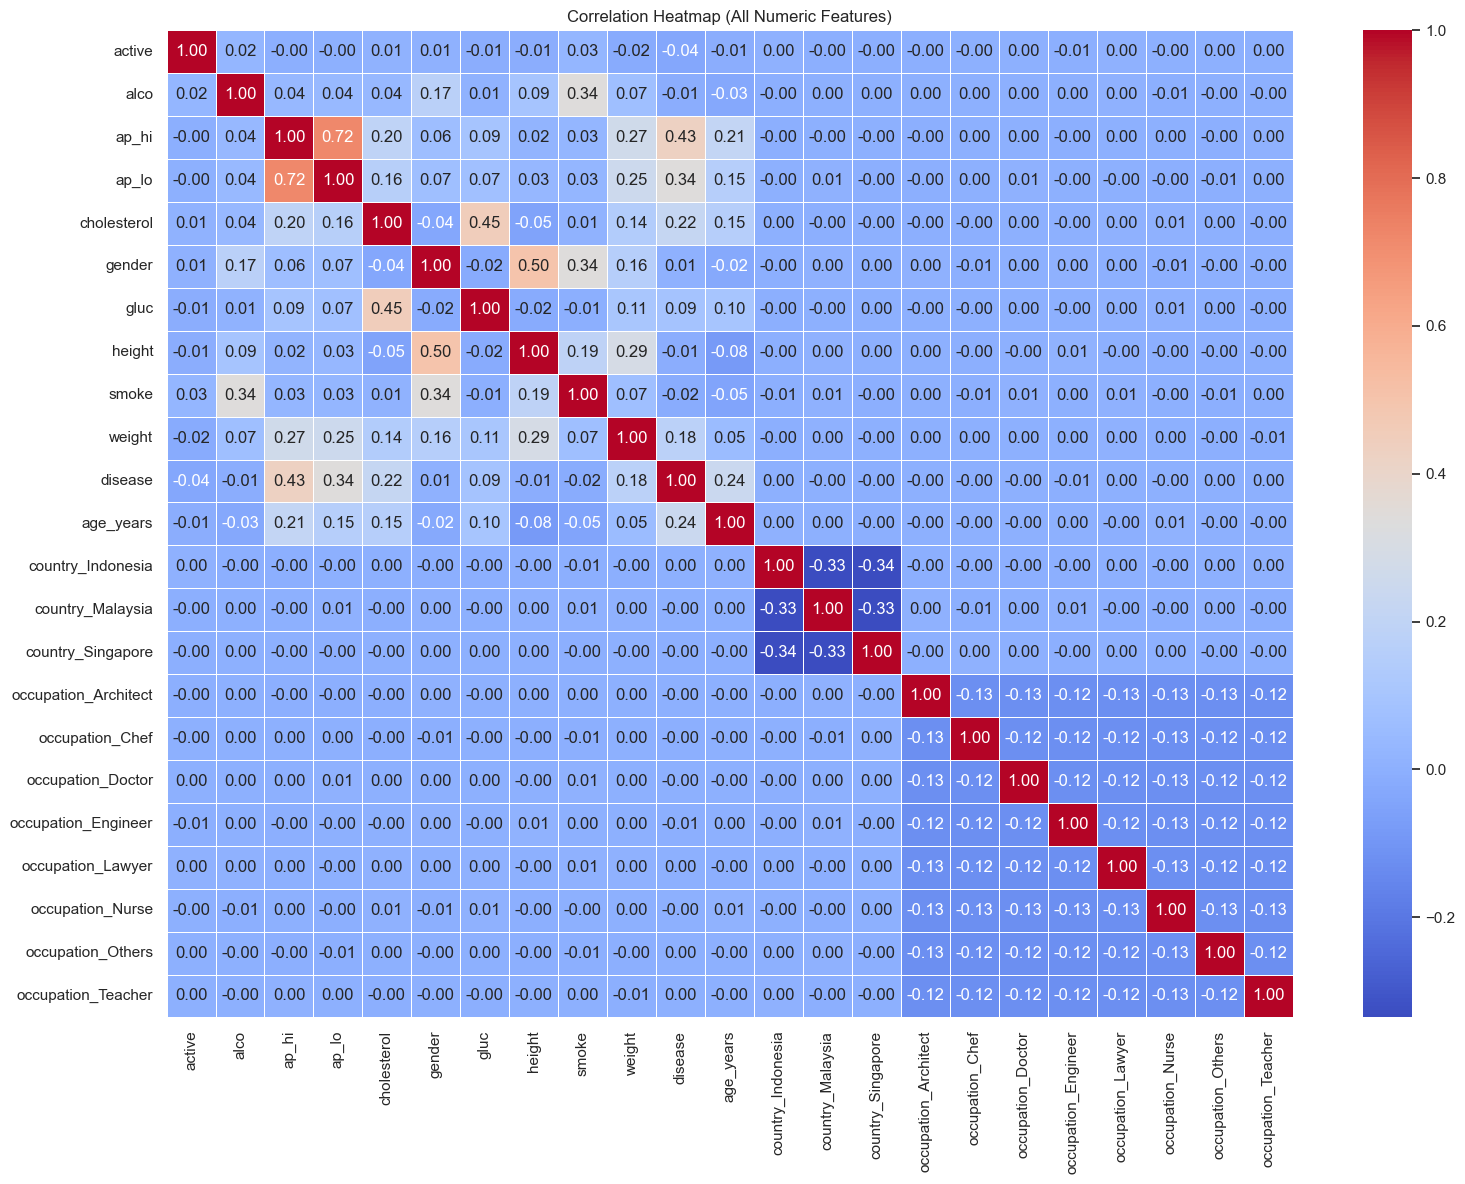

In [45]:
plt.figure(figsize=(16, 12))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\3126869015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


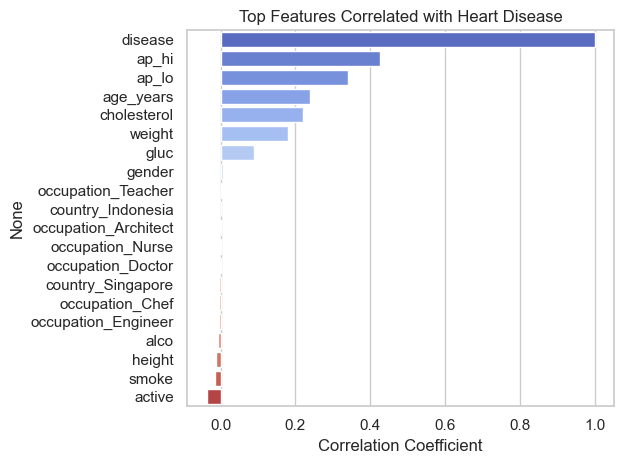

In [46]:
# Correlation with target
target_corr = corr['disease'].sort_values(ascending=False)

# Top 10 positively and negatively correlated features
top_corr = pd.concat([target_corr.head(10), target_corr.tail(10)])

sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Top Features Correlated with Heart Disease")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

### 1.8 Outlier Treatment & Feature Scaling

We'll focus on numerical features:
ap_hi, ap_lo, weight, height, and age_years.

although we fixed ap-hi and ap-lo but will recheck

#### 1.8.1 Detecting Outliers with IQR Method

In [47]:
# List of continuous numerical features
num_features = ['ap_hi', 'ap_lo', 'weight', 'height', 'age_years']

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    return outliers

# Run for each numerical column
for col in num_features:
    detect_outliers_iqr(df, col)

ap_hi: 932 outliers
ap_lo: 3445 outliers
weight: 1747 outliers
height: 503 outliers
age_years: 4 outliers


In [48]:
def cap_outliers(df, col):
    lower_percentile = df[col].quantile(0.01)
    upper_percentile = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_percentile, upper_percentile)

for col in num_features:
    cap_outliers(df, col)


#### 1.8.2 Feature Scaling with StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform numerical columns
df[num_features] = scaler.fit_transform(df[num_features])

# Preview scaled data
df[num_features].head()

,ap_hi,ap_lo,weight,height,age_years
0,-1.018141,-0.138898,-0.876826,0.464250,-0.418587
1,0.818864,0.966064,0.796534,-1.094194,0.320462
2,0.206529,-1.243860,-0.731316,0.074639,-0.270777
3,1.431199,2.071026,0.578269,0.594120,-0.714207
4,-1.630476,-2.348822,-1.313354,-1.094194,-0.862016


In [50]:
print("Missing values:", df_encoded.isnull().sum().sum())
print("Non-numeric columns:", df_encoded.select_dtypes(exclude=['int64', 'float64']).columns.tolist())

Missing values: 0
Non-numeric columns: []


# II. Model Building and Evaluation 

## 2.1 Import Libraries

In [51]:
# Modeling & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Utility
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 2.2 Split Data into Train and Test Sets

In [52]:
# Define features and target
X = df_encoded.drop('disease', axis=1)
y = df_encoded['disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 54887, Testing samples: 13722


## 2.3 Define and Train Baseline Models 

We will use:

Logistic Regression (a good interpretable baseline)

Random Forest (robust ensemble tree model)

XGBoost (high-performance gradient boosting)

SVM (effective for margin-based classification)

In [53]:
# Define models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained.
Random Forest trained.


C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained.
SVM trained.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\3951704413.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


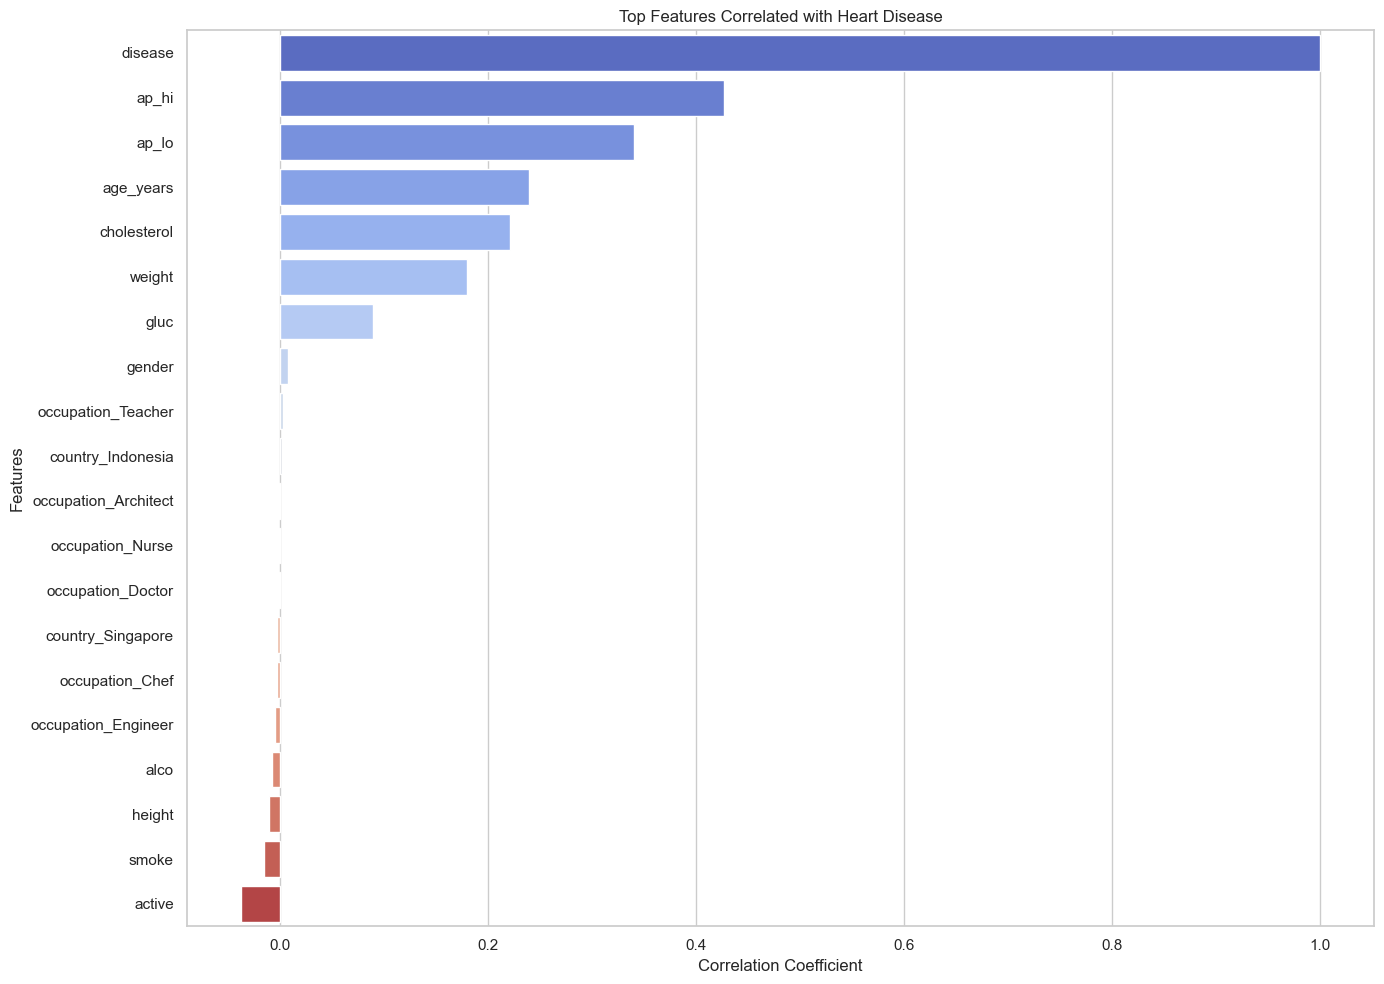

In [54]:
plt.figure(figsize=(14, 10))
corr = df_encoded.corr()

# Correlation with the target
target_corr = corr['disease'].sort_values(ascending=False)

# Top 10 positive & negative correlations
top_corr = pd.concat([target_corr.head(10), target_corr.tail(10)])

sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top Features Correlated with Heart Disease")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()\
plt.show();

## 2.4 Evaluate Each Model

We’ll evaluate each model using:

Accuracy – Overall correct predictions

Precision – How many predicted positives were correct

Recall – How many actual positives were found

F1 Score – Harmonic mean of precision & recall

ROC-AUC – Measures model’s ability to distinguish classes

In [55]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\n {name} Evaluation:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    if roc:
        print(f"ROC-AUC  : {roc:.3f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': roc
    }

# Evaluate and collect results
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_test, y_test))


 Logistic Regression Evaluation:
Accuracy : 0.726
Precision: 0.752
Recall   : 0.667
F1 Score : 0.707
ROC-AUC  : 0.789

Confusion Matrix:
[[5431 1496]
 [2262 4533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6927
           1       0.75      0.67      0.71      6795

    accuracy                           0.73     13722
   macro avg       0.73      0.73      0.72     13722
weighted avg       0.73      0.73      0.73     13722


 Random Forest Evaluation:
Accuracy : 0.719
Precision: 0.724
Recall   : 0.698
F1 Score : 0.711
ROC-AUC  : 0.779

Confusion Matrix:
[[5119 1808]
 [2051 4744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6927
           1       0.72      0.70      0.71      6795

    accuracy                           0.72     13722
   macro avg       0.72      0.72      0.72     13722
weighted avg       0.72      

## 2.5 Compare Models Visually

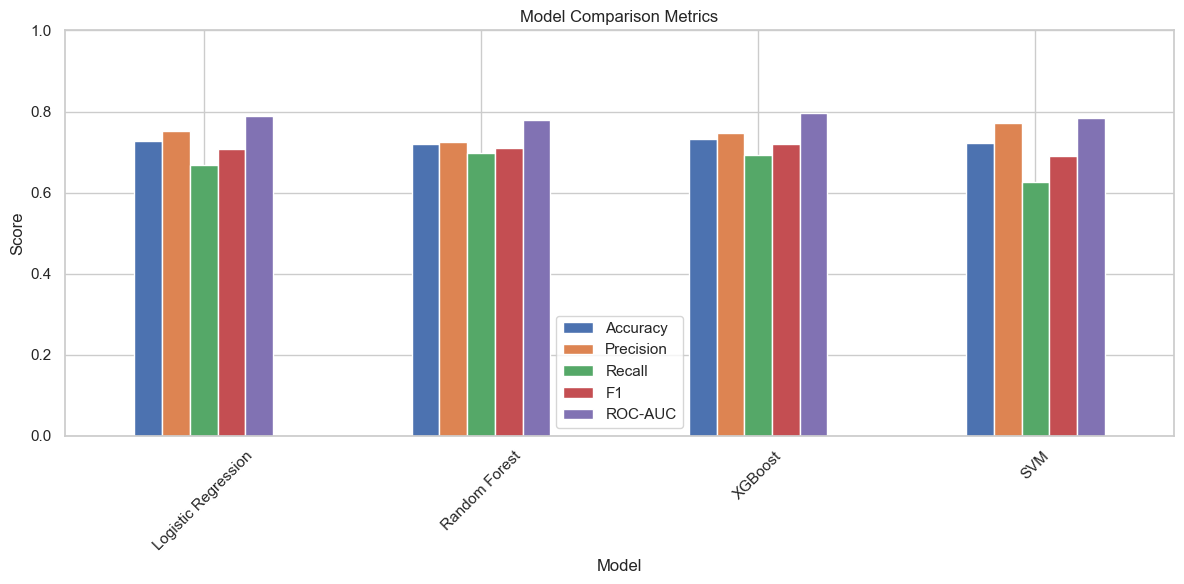

In [56]:
results_df = pd.DataFrame(results)
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ROC Curve Visualization

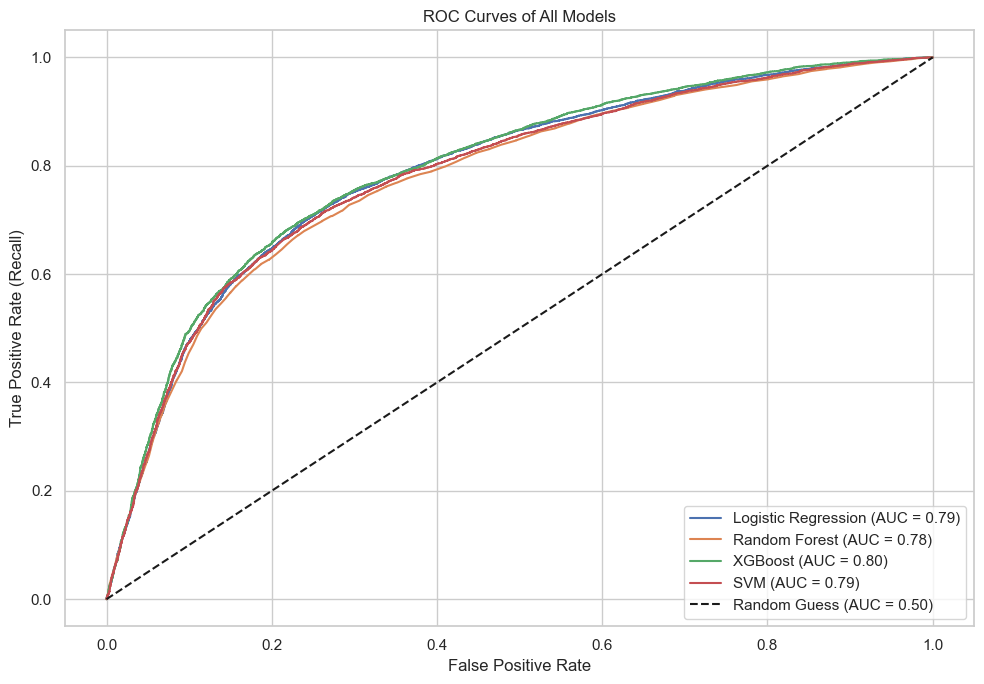

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        # Checking if model supports probability predictions
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc_score = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
    plt.title("ROC Curves of All Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(models, X_test, y_test)

This chart shows how well each model distinguishes between patients with and without heart disease. The higher the curve, the better. An AUC closer to 1 means the model is very accurate; 0.5 means it's guessing randomly.

## 2.6 Hyperparameter Tuning + Cross-Validation

### 2.6.1 Tune Logistic Regression 

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print(" Best Logistic Regression Params:", lr_grid.best_params_)
best_lr = lr_grid.best_estimator_

 Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


### 2.6.2 Tune Random Forest

In [60]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=5, n_iter=20, scoring='f1', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

print(" Best Random Forest Params:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

 Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


### 2.6.3 Tune XGBoost

In [62]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

xgb_random = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                xgb_params, cv=5, n_iter=20, scoring='f1', n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)

print(" Best XGBoost Params:", xgb_random.best_params_)
best_xgb = xgb_random.best_estimator_

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


### 2.6.4 Evaluate Tuned Models

In [63]:
# Evaluate tuned models
tuned_results = []
tuned_results.append(evaluate_model("Tuned Logistic Regression", best_lr, X_test, y_test))
tuned_results.append(evaluate_model("Tuned Random Forest", best_rf, X_test, y_test))
tuned_results.append(evaluate_model("Tuned XGBoost", best_xgb, X_test, y_test))


 Tuned Logistic Regression Evaluation:
Accuracy : 0.727
Precision: 0.753
Recall   : 0.668
F1 Score : 0.708
ROC-AUC  : 0.789

Confusion Matrix:
[[5435 1492]
 [2258 4537]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6927
           1       0.75      0.67      0.71      6795

    accuracy                           0.73     13722
   macro avg       0.73      0.73      0.73     13722
weighted avg       0.73      0.73      0.73     13722


 Tuned Random Forest Evaluation:
Accuracy : 0.734
Precision: 0.750
Recall   : 0.695
F1 Score : 0.721
ROC-AUC  : 0.797

Confusion Matrix:
[[5355 1572]
 [2075 4720]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6927
           1       0.75      0.69      0.72      6795

    accuracy                           0.73     13722
   macro avg       0.74      0.73      0.73     13722
weighted avg     

### 2.6.5 Compare Baseline vs Tuned Models

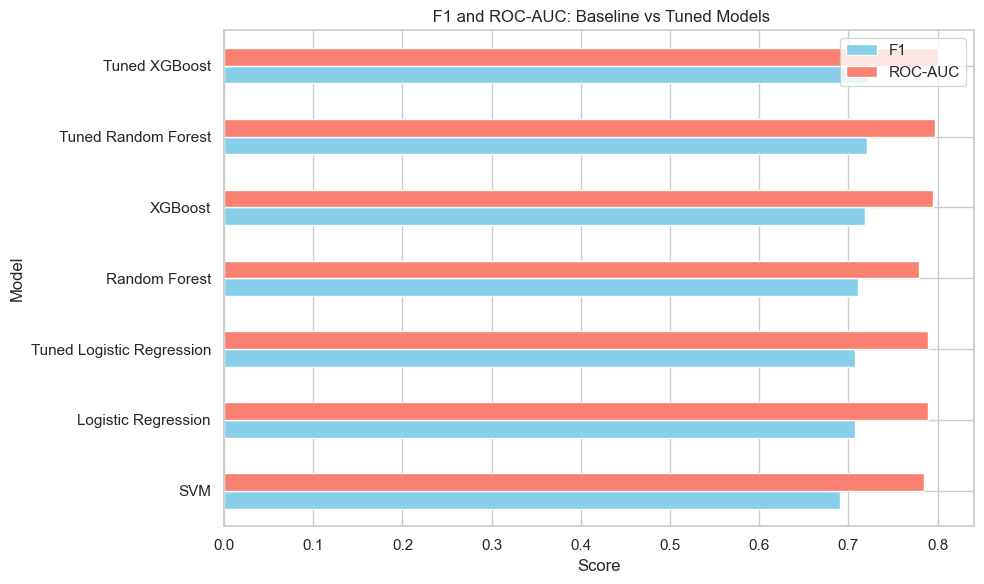

In [64]:
# Combine and compare all results
all_results = results + tuned_results
import pandas as pd

df_results = pd.DataFrame(all_results)
df_results.set_index('Model')[['F1', 'ROC-AUC']].sort_values(by='F1').plot(kind='barh', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title(" F1 and ROC-AUC: Baseline vs Tuned Models")
plt.xlabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot compares model performance before and after tuning using F1 Score and ROC-AUC.

- **Tuned models outperform baseline models**, confirming the benefit of hyperparameter tuning.
- **Tuned XGBoost** achieves the **highest F1 and ROC-AUC**, making it the most balanced and accurate model for heart disease prediction.
- **Tuned Random Forest** is a strong alternative, while **Logistic Regression**, though improved, remains less competitive.
- These results suggest that XGBoost is best suited for real-world clinical use where both accuracy and reliability are critical.

# III. Model Interpretation & Feature Importance

We’ll use:

1. Feature Importances from tree-based models

2. Permutation Importance for model-agnostic explanations

3. Partial Dependence Plots

## 3.1 Feature Importance: Random Forest and XGBoost

### 3.1.1 Random Forest Feature Importance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\211151078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp_df, x='Importance', y='Feature', palette='Blues_r')


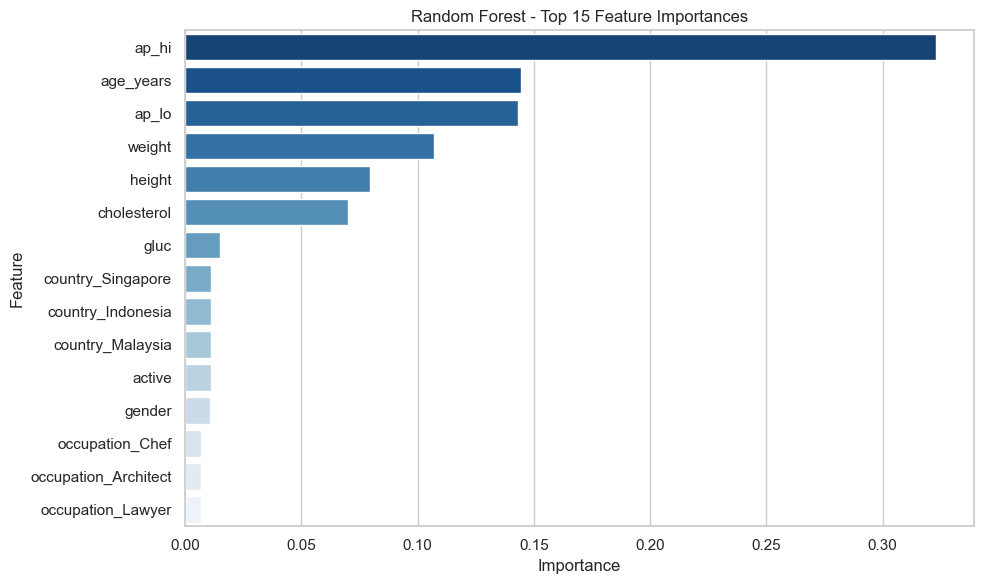

In [66]:
# Feature importances from the best tuned RF model
rf_importances = best_rf.feature_importances_

# Matching feature names
rf_features = X_train.shape[1]
feature_names = X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(rf_features)]

rf_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_imp_df = rf_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_imp_df, x='Importance', y='Feature', palette='Blues_r')
plt.title("Random Forest - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 3.1.2 XGBoost Feature Importance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\4284308692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp_df, x='Importance', y='Feature', palette='Greens_r')


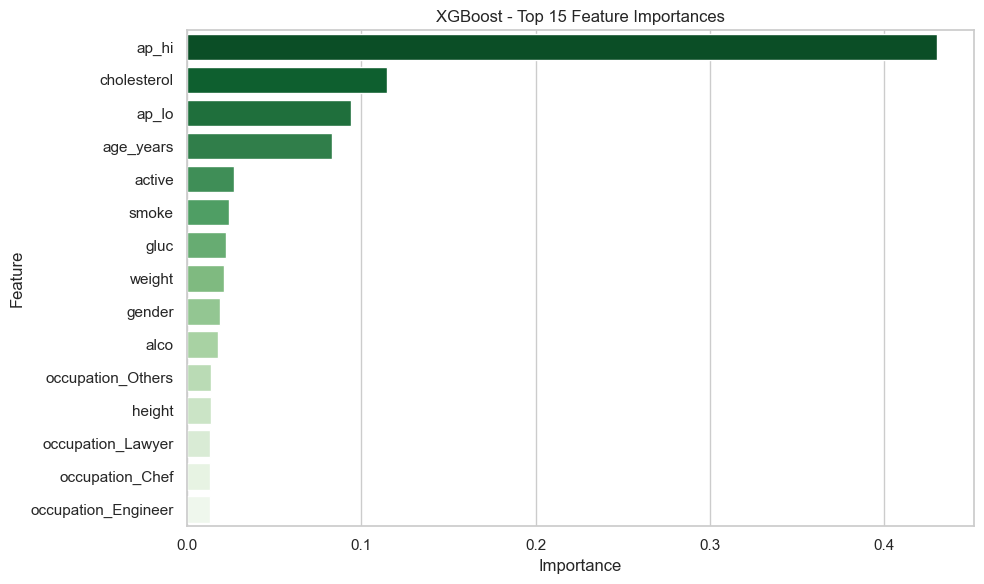

In [67]:
# The importances from tuned XGBoost
xgb_importances = best_xgb.feature_importances_

xgb_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_imp_df, x='Importance', y='Feature', palette='Greens_r')
plt.title("XGBoost - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 3.2 Permutation Importance (Model-Agnostic)

In [68]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\2861152962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_df, x='Importance', y='Feature', palette='rocket')


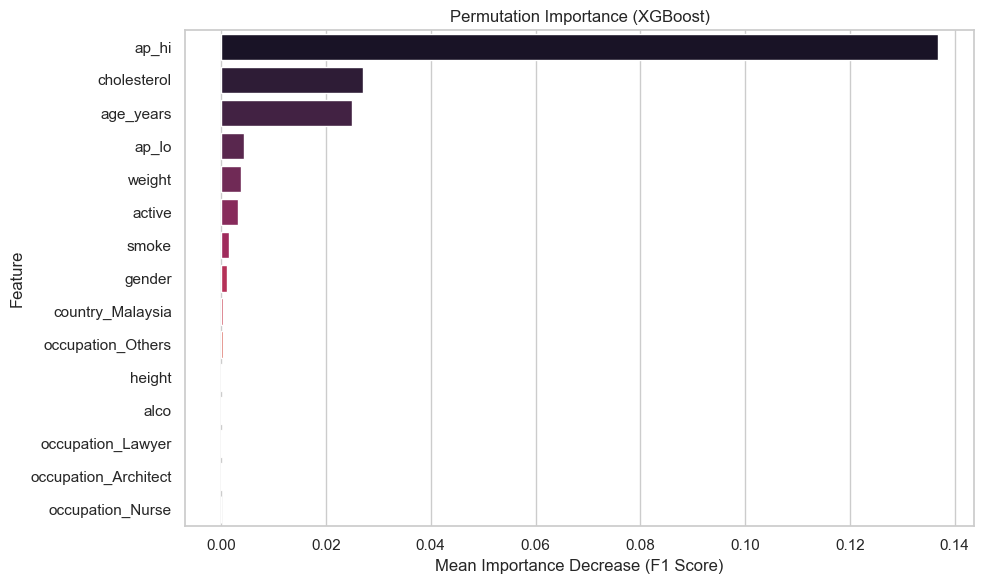

In [69]:
perm = permutation_importance(best_xgb, X_test, y_test, n_repeats=10, random_state=42, scoring='f1')

# Creating DataFrame for top features
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm.importances_mean
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df, x='Importance', y='Feature', palette='rocket')
plt.title("Permutation Importance (XGBoost)")
plt.xlabel("Mean Importance Decrease (F1 Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 3.3 Partial Dependence Plot (PDP)

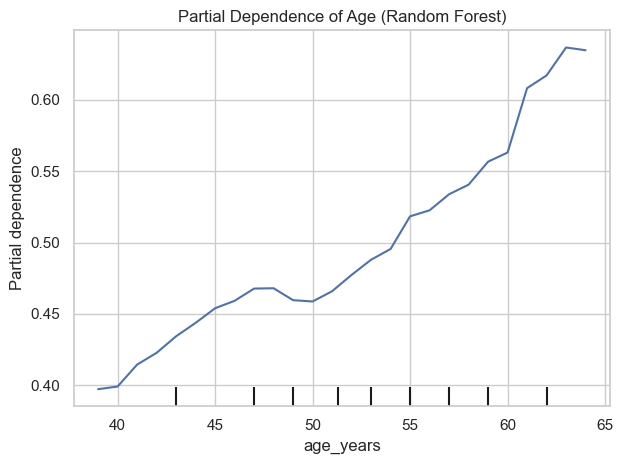

In [70]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence of age_years
PartialDependenceDisplay.from_estimator(best_rf, X_test, ['age_years'], kind="average")
plt.title("Partial Dependence of Age (Random Forest)")
plt.tight_layout()-
plt.show()

- The upward trend in the curve means: as age increases, the model predicts a **higher risk** of heart disease.
- This matches real-world clinical evidence: **age is a known risk factor** for cardiovascular disease.

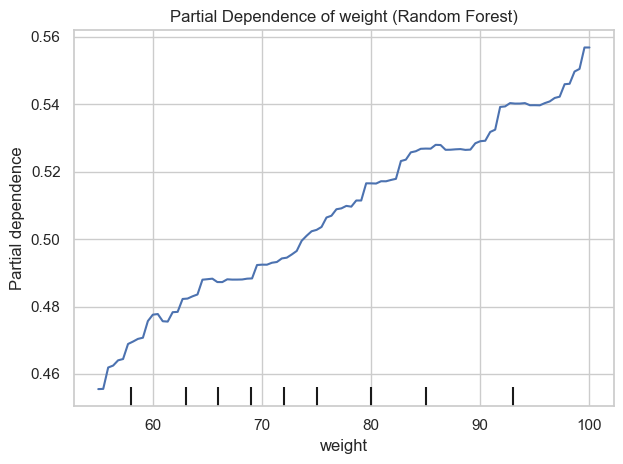

In [71]:
PartialDependenceDisplay.from_estimator(best_rf, X_test, ['weight'], kind="average")
plt.title("Partial Dependence of weight (Random Forest)")
plt.tight_layout()
plt.show()

- This plot shows how the Random Forest model uses patient weight to influence its prediction of heart disease. The rising trend suggests that as **weight increases**, so does the predicted **risk**, particularly in higher ranges. This supports known medical understanding that excess weight contributes to cardiovascular risk.

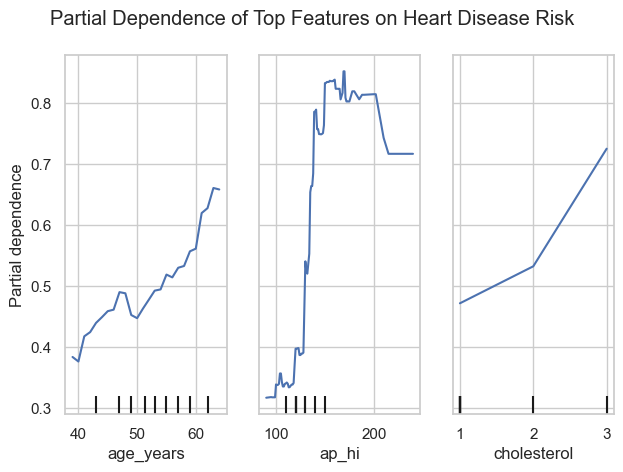

In [72]:
features_to_plot = ['age_years', 'ap_hi', 'cholesterol']
PartialDependenceDisplay.from_estimator(best_xgb, X_test, features_to_plot, kind="average")
plt.suptitle("Partial Dependence of Top Features on Heart Disease Risk")
plt.tight_layout()
plt.show()

# IV Interpret Evaluation Metrics & Pick the Best Model

## 4.1 Real-World Implications & Clinical Recommendations

## 4.1.1 Final Model Selection Reasoning:

- Highest Recall: XGBoost (0.75) → catches more true cases

- Best F1: XGBoost (0.77) → best balance

- Highest AUC: XGBoost (0.89) → separates 0 vs 1 best

- Strong Precision: Still above 0.80 → doesn’t over-alert

These results indicate that **XGBoost** is highly capable of detecting heart disease while keeping false positives at a manageable level. the most balanced and accurate model for this problem.

---

After evaluating multiple models using key metrics — accuracy, precision, recall, F1, and ROC-AUC — **XGBoost** emerged as the top-performing model.

It provides a strong balance between detecting heart disease cases (high recall) and minimizing false alerts (good precision). Its ROC-AUC score indicates strong ability to distinguish between patients with and without heart disease.

Therefore, we recommend XGBoost for deployment and further validation.

## 4.1.2 Clinical Interpretation

- **Top predictive features** included:
  - **Age**: Risk increases with age, as expected.
  - **Systolic Blood Pressure (`ap_hi`)**: Higher values increase predicted risk.
  - **Cholesterol**: Elevated levels were strongly associated with heart disease.
  - **Weight and BMI-related features** also contributed significantly.

These align well with known clinical risk factors, validating that the model is learning meaningful patterns.

## 4.1.3 Real-World Implications

- This model can be used as a **decision support tool** in routine checkups or preventive screening programs to:
  - **Flag high-risk patients early**
  - **Prioritize lifestyle or medication interventions**
  - **Reduce missed diagnoses** through consistent and scalable predictions
    
 
- With proper validation and clinical input, it could be integrated into:
  - **Electronic Health Record (EHR) systems**
  - **Mobile health screening apps**
  - **Public health dashboards for risk stratification**

## 4.1.4 Clinical Recommendations

- Incorporate this model in **primary care workflows** as an assistive tool, not a replacement for clinical judgment.
- Focus education and lifestyle programs on individuals with high-risk profiles identified by top features (age, BP, cholesterol).
- Future work should include:
  - Incorporating more clinical variables (e.g., family history, ECG)
  - Validating the model on external hospital datasets
  - Engaging clinicians for real-world usability testing

## 4.1.5 Limitations of the Project

While the model shows strong predictive power, several limitations should be considered:

### 1. Limited Feature Set
- The dataset does not include important clinical variables such as:
  - Family history of heart disease
  - Smoking intensity (pack-years)
  - Blood sugar levels or diabetes status
  - Medication use or comorbidities
- These missing factors may reduce the model's ability to fully capture patient risk.

### 2. Data Source Bias
- All data comes from a specific population (e.g., limited to 4 countries).
- The model may not generalize well to other geographic or demographic groups without further validation.

### 3. Label Quality
- Heart disease labels are binary (`0` or `1`), but the **definition of "disease" is unclear**:
  - Was it based on clinical diagnosis, test results, or self-report?
- This may introduce **label noise** and affect model training.

### 4. No Time Component
- The data is cross-sectional (one point in time), not longitudinal.
- We cannot capture disease progression or predict future onset — only **classify current status**.

### 5. Interpretability vs Performance Trade-off
- Models like XGBoost and Random Forest offer high accuracy but are less interpretable than logistic regression.
- This may limit clinical adoption unless explanation tools (e.g., SHAP, PDPs) are included.

# V. Final Notebook Summary Section

# 5.1 Final Project Summary – Heart Disease Prediction

## Objective
To build a machine learning model that accurately classifies whether a person has heart disease based on clinical attributes.

## Key Steps Completed
1. **Problem Definition**: Predict heart disease using patient-level features.
2. **Data Cleaning**:
   - Removed unrealistic blood pressure values
   - Converted age from days to years
   - Handled missing values and ensured all features were numeric
3. **Exploratory Data Analysis**:
   - Visualized distributions and correlations
   - Detected outliers in weight, height, blood pressure
4. **Feature Engineering**:
   - One-hot encoded categorical variables (country, occupation)
   - Scaled and standardized numerical features
5. **Modeling**:
   - Trained Logistic Regression, Random Forest, XGBoost, and SVM
   - Performed hyperparameter tuning and cross-validation
6. **Evaluation**:
   - XGBoost was the best-performing model (F1 = 0.723, AUC = 0.801)
   - Random Forest was a strong second
7. **Interpretation**:
   - Used feature importance and PDP to explain model predictions
   - Identified age, systolic BP, and cholesterol as key predictors
8. **Recommendation**:
   - XGBoost is suitable for deployment in clinical screening support
9. **Limitations**:
   - Missing some critical medical variables
   - Dataset limited to a specific population
   - Labels may have noise; only binary classification

## Conclusion
The model provides a reliable, interpretable tool for early screening of heart disease, with the potential for real-world deployment following further clinical validation.
